In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from calendar import monthrange

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [34]:
# Read csv file, convert time to datetime data type
df = pd.read_csv('flex_networks.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)

In [35]:
# Predictors are DoW and HoD
times = df['Timestamp']
DoW = []
HoD = []
MoY = []

for x in times:
    DoW.append(x.weekday())
    HoD.append(x.hour)
    MoY.append(x.month)

df['DoW'] = DoW
df['HoD'] = HoD
df['MoY'] = MoY

df['crawford_pers_forecast'] = df['crawfordCrescent_F2'].shift(336, axis=0)

In [36]:
targetColumn = ['crawfordCrescent_F2']
predictors = ['DoW', 'HoD', 'crawford_pers_forecast']
df[predictors] = df[predictors]/df[predictors].max()

In [38]:
month = 7

X = df[predictors].loc[df['MoY'] == month].values
y = df[targetColumn].loc[df['MoY'] == month].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(940, 3)
(404, 3)


In [39]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([[ 0.67549468,  3.2155123 , 16.64508779]])

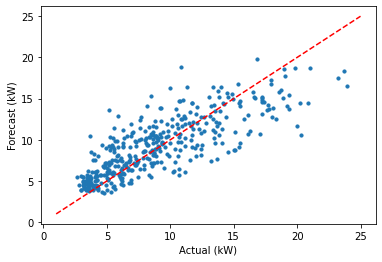

In [46]:
y_pred = reg.predict(X_test)
error = y_pred - y_test
mean_absolute_error(y_test, y_pred)

plt.scatter(y_test, y_pred, s=10)
plt.plot([1,25], [1,25], c="r",ls="--")
plt.xlabel("Actual (kW)")
plt.ylabel("Forecast (kW)")
#plt.savefig("linear.jpg", dpi=300)
plt.show()

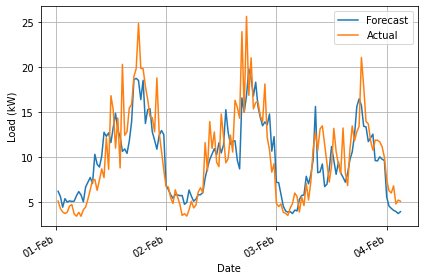

In [44]:
l = 1488
h = 1488 + 150

febPred = reg.predict(df[predictors].iloc[l:h])

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[l:h], febPred, label="Forecast")
ax.plot(df["Timestamp"].iloc[l:h], df["crawfordCrescent_F2"].iloc[l:h], label="Actual")
# Major ticks every day
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)")
ax.set_xlabel("Date")
ax.legend()

plt.tight_layout()
#plt.savefig("pers_forecast.jpg", dpi=300, bbox_inches="tight")
plt.show()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'